In [119]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt

## Creat A Database

In [120]:
df = pd.read_csv("Details.csv")

conn = sqlite3.connect("sales_data.db")

df.to_sql("sales", conn, if_exists="replace", index=False)   # Write DataFrame to a table named 'sales'

print("Database created successfully from CSV!")

Database created successfully from CSV!


## Read the 'sales' table

In [121]:
df = pd.read_sql_query("SELECT * FROM sales", conn)
print("\nSales Table Data:\n", df)


Sales Table Data:
      Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0     B-25681    1096     658         7  Electronics  Electronic Games   
1     B-26055    5729      64        14    Furniture            Chairs   
2     B-25955    2927     146         8    Furniture         Bookcases   
3     B-26093    2847     712         8  Electronics          Printers   
4     B-25602    2617    1151         4  Electronics            Phones   
...       ...     ...     ...       ...          ...               ...   
1495  B-25700       7      -3         2     Clothing       Hankerchief   
1496  B-25757    3151     -35         7     Clothing          Trousers   
1497  B-25973    4141    1698        13  Electronics          Printers   
1498  B-25698       7      -2         1     Clothing       Hankerchief   
1499  B-25993    4363     305         5    Furniture            Tables   

      PaymentMode  
0             COD  
1             EMI  
2             EMI  
3     Credi

In [122]:
df=pd.read_sql_query(" SELECT SUM(Quantity) AS Total_Quantity FROM sales",conn)
print("Total Quantity Sold:\n",df)

Total Quantity Sold:
    Total_Quantity
0            5615


## Total_Revenue & Total_Profit

In [123]:
df=pd.read_sql_query(" SELECT SUM(Quantity * Amount) AS Total_Revenue, SUM(Profit) AS Total_Profit FROM sales",conn)
print(df)

   Total_Revenue  Total_Profit
0        2172002         36963


##  Category-wise Quantity, Revenue, and Profit

In [129]:
query = """
SELECT 
    Category,
    SUM(quantity) AS Total_qty,
    SUM(quantity * Amount) AS Revenue,
    SUM(profit) AS Profit
FROM sales
group by Category
ORDER BY Revenue DESC;
"""
df = pd.read_sql_query(query, conn)
print(df)


      Category  Total_qty  Revenue  Profit
0  Electronics       1154   818583   13162
1     Clothing       3516   687654   13325
2    Furniture        945   665765   10476


## Revenue by Category

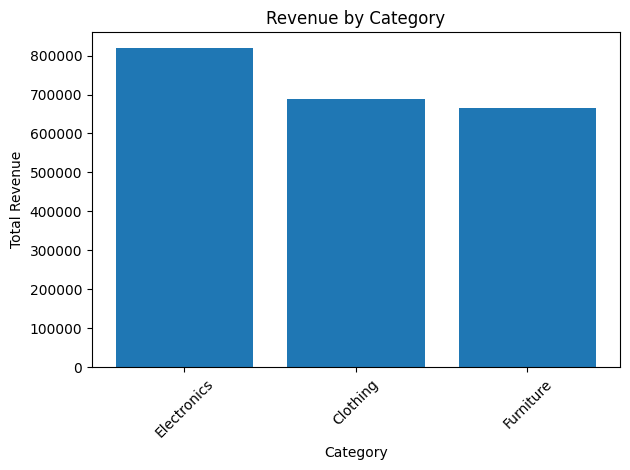

In [127]:
plt.bar(df['Category'], df['Revenue'])
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Revenue by category.png")
plt.show()

##  Sales by Category 

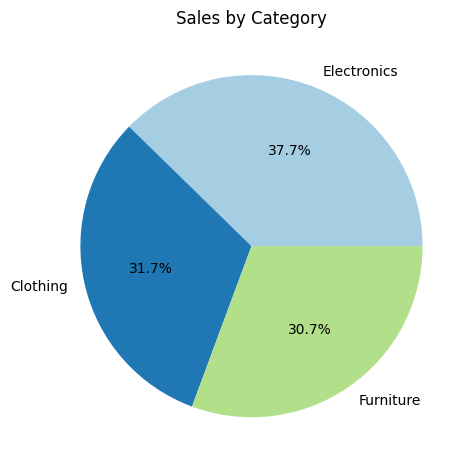

In [131]:
plt.pie(
    df['Revenue'],
    labels=df['Category'],
    autopct='%1.1f%%',      
    colors=plt.cm.Paired.colors 
)
plt.title("Sales by Category")
plt.tight_layout()
plt.savefig("Sales by category.png")
plt.show()

## Sub-Category Sales, Revenue, Profit, and Quantity  

In [132]:
query = """
SELECT
    "Sub-Category" AS sub_category,
    SUM(Quantity) AS total_qty,
    SUM(Amount) AS revenue,
    SUM(Profit) AS Profit
FROM sales
GROUP BY "Sub-Category"
ORDER BY revenue DESC;
"""
df = pd.read_sql_query(query, conn)
print(df)


        sub_category  total_qty  revenue  Profit
0           Printers        291    59252    8606
1              Saree        795    59094    4057
2          Bookcases        297    56861    6516
3             Phones        304    46119    1847
4   Electronic Games        297    39168    -644
5             Chairs        277    34222    1627
6           Trousers        135    30039    2847
7             Tables         61    22614    3139
8        Accessories        262    21728    3353
9              Stole        671    18546    2431
10       Hankerchief        741    14294    1823
11       Furnishings        310    13484    -806
12             Shirt        271     7555    1513
13           T-shirt        305     7382    1500
14             Kurti        164     3361    -401
15          Leggings        186     2106    -130
16             Skirt        248     1946    -315


## Sub-Category by Revenue

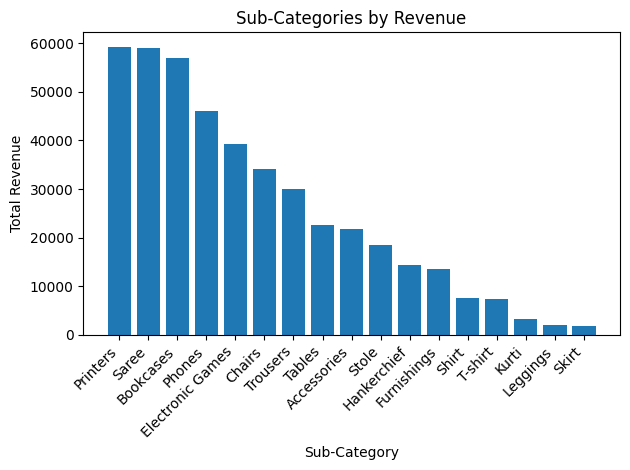

In [133]:
plt.bar(df['sub_category'], df['revenue'])
plt.title("Sub-Categories by Revenue")
plt.xlabel("Sub-Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(" by sub category.png")
plt.show()

## Revenue by Payment Mode

In [134]:
query = """
SELECT
    PaymentMode,
    SUM(Amount) AS revenue
FROM sales
GROUP BY PaymentMode
ORDER BY revenue DESC;
"""
df = pd.read_sql_query(query, conn)
print(df)


   PaymentMode  revenue
0          COD   155181
1  Credit Card    86932
2          EMI    77881
3          UPI    68641
4   Debit Card    49136


## Revenue Share by Payment Mode

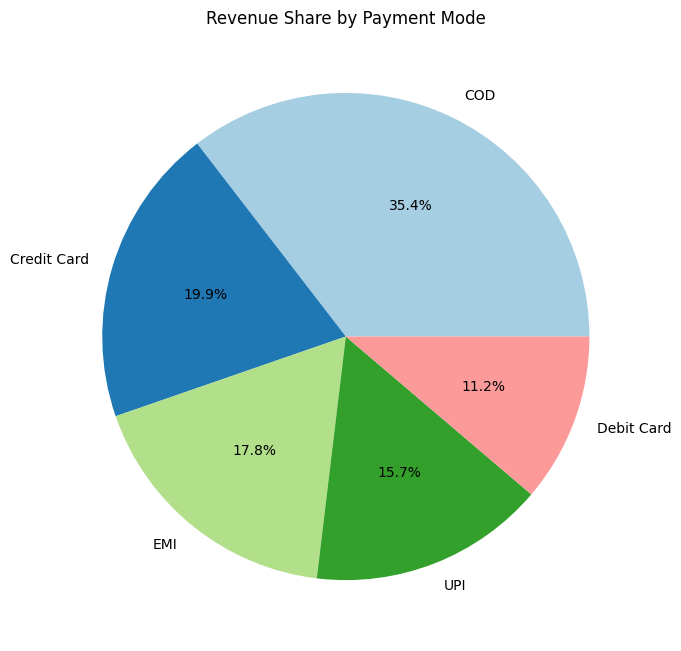

In [135]:
plt.figure(figsize=(7, 7))
plt.pie(
    df['revenue'],
    labels=df['PaymentMode'],
    autopct='%1.1f%%',      
    colors=plt.cm.Paired.colors 
)
plt.title("Revenue Share by Payment Mode")
plt.tight_layout()
plt.savefig("payment_mode_pie.png")
plt.show()